![IronHack Logo](https://s3-eu-west-1.amazonaws.com/ih-materials/uploads/upload_d5c5793015fec3be28a63c4fa3dd4d55.png)

# Pipelines Project

## Octavio Garcia (W3D1)

Descripción del proyecto...

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
fileName = "./datos.csv" 
df_original = pd.read_csv(fileName)
df_raw_raw = df_original.copy()
display(df_raw_raw.head())

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


### Análisis inicial de la calidad de los datos
Realizo análisis inicial para verificar que son datos que se pueden trabajar amablemente:

- Registros duplicados.
- Tipo de datos en cada columna.
- Análisis de nulos.

In [32]:
#Tipo de datos
display(df_raw_raw.dtypes)

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [33]:
#Análisis de duplicados
b = len(df_raw_raw)
df_raw = df_raw_raw.drop_duplicates()
a = len(df_raw)
print('Número de registros duplicados eliminados: ', str(b - a))

Número de registros duplicados eliminados:  0


In [34]:
#Análisis de nulos
null_col = df_raw.isnull().sum()
display(null_col)

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

### Limpieza de datos
Realizo limpieza de los datos:

- Elimino columna 'HDI for year' ya que contiene un 70% de valores nulos.
- Elimino columna 'country-year' ya que son datos redundantes. 
- Elimino columna 'gdp_for_year' ya que son datos tipo 'object' con los que no se puede trabajar numéricamente y con el gdp per capita se pueden proponer mejores hipótesis.

In [35]:
col_clean = ['country-year','HDI for year',' gdp_for_year ($) ']
df_clean = df_raw.drop(col_clean, axis=1)
display(df_clean.head())

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,796,Boomers


### Hipótesis
Este  data set permite realizar varias propuestas de hipótesis al respecto del fenómeno de los suicidios en todo el mundo durante los últimos 30 años:

- Se pueden presentar gráficamente los ratios de suicidio ('suicides/100k pop') por diferentes criterios: país, género y rango de edad. 
- Se pueden generar 'bins' dentro de diferentes atributos y compararlos: zonas geográficas (e.g.: continentes), eṕocas (e.g.: 1985-1995, 1996-2009,...), generaciones, 
- Se pueden establecer relaciones con los valores numericos como la población o GDP per capita y buscar algún tipo de correlación.

### Data wrangling
Realizo varias acciones de transformación de los datos:

- Cambio la denominación de las columnas para mejor manejo y posterior presentación en informes.
- Analizo los datos en detalle para verificar que no haya inconsistencias antes de pla

In [36]:
#Renombro columnas para mejor manejo y posterior generación de informes.
df_w1 = df_clean.rename(index=str, columns={'country':'Country','year':'Year','sex':'Gender','age':'Ages',
                                            'suicides_no':'Suicides','population':'Population',
                                            'suicides/100k pop':'Suicidesx100k','gdp_per_capita ($)':'GDPxCapita',
                                            'generation':'Generation'})
display(df_w1.head())

,Country,Year,Gender,Ages,Suicides,Population,Suicidesx100k,GDPxCapita,Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,796,Boomers


In [37]:
#Analizo los datos en busqueda de inconsistencias
atributes = ['Country','Year','Gender','Ages','Suicides','Population','Suicidesx100k','GDPxCapita','Generation']
#print(set(df_w1['Country']))
print('Country',len(set(df_w1['Country']))) 
print(set(df_w1['Year']))
print('Year',len(set(df_w1['Year']))) 
print(set(df_w1['Gender']))
print('Gender',len(set(df_w1['Gender']))) 
print(set(df_w1['Ages']))
print('Ages',len(set(df_w1['Ages']))) 
#print(set(df_w1['Suicides']))
print('Suicides',len(set(df_w1['Suicides']))) 
#print(set(df_w1['Population']))
print('Population',len(set(df_w1['Population']))) 
#print(set(df_w1['Suicidesx100k']))
print('Suicidesx100k',len(set(df_w1['Suicidesx100k']))) 
#print(set(df_w1['GDPxCapita']))
print('GDPxCapita',len(set(df_w1['GDPxCapita']))) 
print(set(df_w1['Generation']))
print('Generation',len(set(df_w1['Generation']))) 
display(df_w1)

Country 101
{1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016}
Year 32
{'female', 'male'}
Gender 2
{'75+ years', '5-14 years', '15-24 years', '55-74 years', '35-54 years', '25-34 years'}
Ages 6
Suicides 2084
Population 25564
Suicidesx100k 5298
GDPxCapita 2233
{'Millenials', 'Generation X', 'G.I. Generation', 'Boomers', 'Generation Z', 'Silent'}
Generation 6


,Country,Year,Gender,Ages,Suicides,Population,Suicidesx100k,GDPxCapita,Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,796,Generation X


In [38]:
#Se detecta que la columna 'Generation' es inconsistente (no se corresponde adecuadamente con la columna 'Ages') 
#por lo que la eliminamos
col_inconsist = ['Generation']
df_w2 = df_w1.drop(col_inconsist, axis=1)
display(df_w2.head(20))

,Country,Year,Gender,Ages,Suicides,Population,Suicidesx100k,GDPxCapita
0,Albania,1987,male,15-24 years,21,312900,6.71,796
1,Albania,1987,male,35-54 years,16,308000,5.19,796
2,Albania,1987,female,15-24 years,14,289700,4.83,796
3,Albania,1987,male,75+ years,1,21800,4.59,796
4,Albania,1987,male,25-34 years,9,274300,3.28,796
5,Albania,1987,female,75+ years,1,35600,2.81,796
6,Albania,1987,female,35-54 years,6,278800,2.15,796
7,Albania,1987,female,25-34 years,4,257200,1.56,796
8,Albania,1987,male,55-74 years,1,137500,0.73,796
9,Albania,1987,female,5-14 years,0,311000,0.00,796


In [57]:
#Reporte de datos de Sx100k 
col_country = ['Year','Population','Suicides','GDPxCapita']
df_w3 = df_w2.drop(col_country, axis=1)
df_country = df_w3.groupby(['Country','Ages']).sum()
display(df_country.sort_values(by=['Country','Ages'], ascending=False).head())

Suicidesx100k
Country    Ages                      
Uzbekistan 75+ years           377.46
           55-74 years         416.46
           5-14 years           47.45
           35-54 years         484.06
           25-34 years         436.28

In [69]:
#Bins
decade_labels = ['1985-1995', '1996-2006', '2007-2016']
cutoffs = [1985,1996,2007,2016]
decade_bins = pd.cut(df_w2['Year'],cutoffs, labels=decade_labels)
#decade_bins.head()
col_decade = ['Country','Year','Ages','Population','Suicidesx100k','GDPxCapita']
df_w4 = df_w2.drop(col_decade, axis=1)
df_w4['Decades'] = decade_bins
df_decades = df_w4.groupby(['Decades','Gender']).sum()
display(df_decades.sort_values(by=['Decades','Gender'], ascending=False).head(30))

Suicides
Decades   Gender          
2007-2016 male     1425197
          female    424509
1996-2006 male     2111087
          female    596031
1985-1995 male     1569042
          female    506491

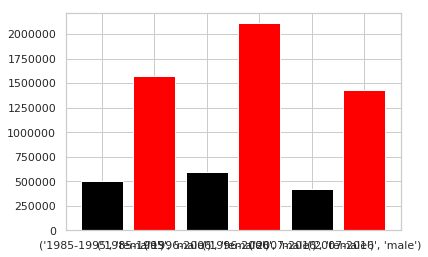

In [71]:
height = list(df_decades["Suicides"])
bars = tuple(df_decades.index)
y_pos = np.arange(len(bars))

plt.bar(y_pos, height, color=['black', 'red'])
plt.xticks(y_pos, bars)
plt.savefig("test1", bbox_inches='tight')

In [41]:
#Pivot table
table_country = pd.pivot_table(df_w2, values='Suicides', index=['Country'], columns=['Ages'],aggfunc=np.sum)
display(table_country.head())

Ages,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years
Country,,,,,,
Albania,546.0,427.0,591.0,61.0,264.0,81.0
Antigua and Barbuda,0.0,1.0,6.0,0.0,4.0,0.0
Argentina,17655.0,13490.0,21781.0,1452.0,19862.0,7979.0
Armenia,175.0,290.0,649.0,24.0,574.0,193.0
Aruba,7.0,24.0,42.0,0.0,22.0,6.0


### IDEAS

In [1]:
#Statistics
#stats = df_w2.describe().transpose()
#display(stats.head())